# Loading Resources

In [10]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

from tabulate import tabulate

In [11]:
m = Darknet('./yolov3.cfg')
m.load_weights('./cater.weights')
class_names = load_class_names('./class.names')

# Object Detection



It took 4.127 seconds to detect the objects in the image.

Number of Objects Detected: 17 

Objects Found and Confidence Level:

1. dog: 0.999997
2. cat: 0.999997
3. cat: 1.000000
4. dog: 0.959597
5. cat: 1.000000
6. dog: 0.999999
7. cat: 0.999887
8. dog: 1.000000
9. dog: 0.998016
10. cat: 0.999906
11. dog: 0.999868
12. cat: 0.999984
13. cat: 0.999887
14. dog: 0.998286
15. dog: 0.820581
16. cat: 0.774113
17. cat: 0.981193


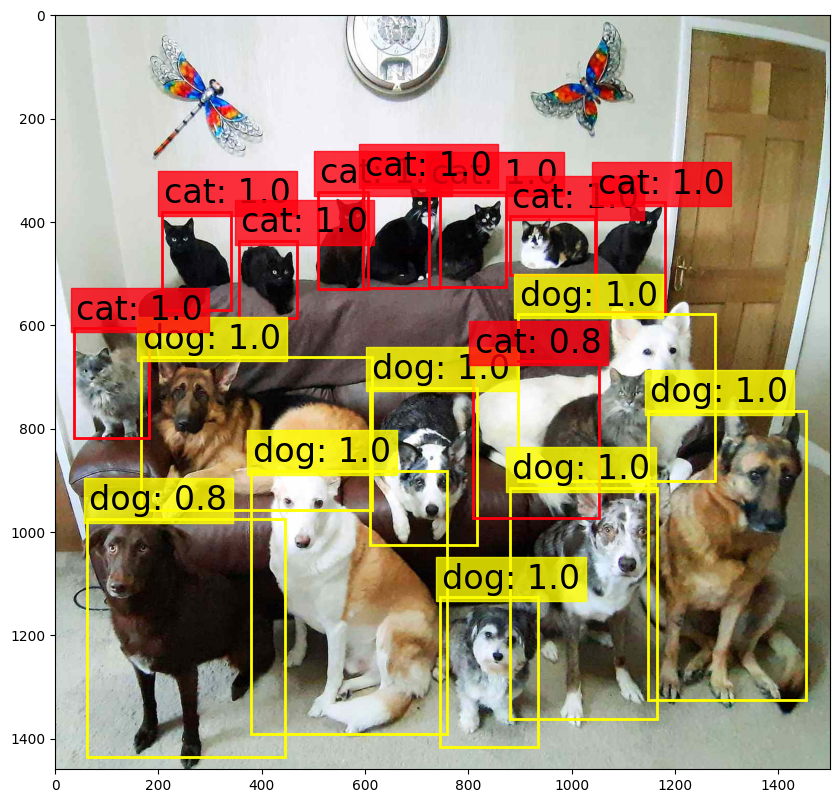

In [12]:
plt.rcParams['figure.figsize'] = [10, 10.0]

img = cv2.imread('./cats_dogs.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
iou_thresh = 0.4
nms_thresh = 0.6

boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [22]:
category_counts = {}
for box in boxes:
    category = class_names[box[6]]
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

table_data = []
for category, count in category_counts.items():
    table_data.append([category, count])
    
total_objects_detected = sum(category_counts.values())
avg_objects_per_category = total_objects_detected / len(category_counts)
total_confidence = sum(box[5] for box in boxes)
avg_confidence_level = total_confidence / total_objects_detected if total_objects_detected > 0 else 0

table = [
    ["Metric", "Value"],
    ["Total Objects Detected", total_objects_detected],
    ["Number of Categories", len(category_counts)],
    ["Avg. Objects per Category", avg_objects_per_category],
    ["Avg. Confidence Level", "{:.4f}".format(avg_confidence_level)]]

print("\nConclusion Tables:")
print(tabulate(table_data, headers=["Category", "Count"], tablefmt="grid"))
print(tabulate(table, headers="firstrow", tablefmt="grid"))


Conclusion Tables:
+--------------+---------+
| Category     |   Count |
+==============+=========+
| baseball bat |       2 |
+--------------+---------+
| knife        |       2 |
+--------------+---------+
| tie          |       1 |
+--------------+---------+
| toothbrush   |       1 |
+--------------+---------+
+---------------------------+---------+
| Metric                    |   Value |
+===========================+=========+
| Total Objects Detected    |    6    |
+---------------------------+---------+
| Number of Categories      |    4    |
+---------------------------+---------+
| Avg. Objects per Category |    1.5  |
+---------------------------+---------+
| Avg. Confidence Level     |    0.62 |
+---------------------------+---------+


In [31]:
import cv2
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tabulate import tabulate

# Define your functions here

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = cv2.imread(file_path)
        original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(original_image, (m.width, m.height))
        boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
        category_counts = {}
        for box in boxes:
            category = class_names[box[6]]
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1

        total_objects_detected = sum(category_counts.values())
        avg_objects_per_category = total_objects_detected / len(category_counts)
        total_confidence = sum(box[5] for box in boxes)
        avg_confidence_level = total_confidence / total_objects_detected if total_objects_detected > 0 else 0

        table_data = []
        for category, count in category_counts.items():
            table_data.append([category, count])

        table = [
            ["Metric", "Value"],
            ["Total Objects Detected", total_objects_detected],
            ["Number of Categories", len(category_counts)],
            ["Avg. Objects per Category", avg_objects_per_category],
            ["Avg. Confidence Level", "{:.4f}".format(avg_confidence_level)]
        ]

        # Additional information for conclusion
        conclusion_info = "\n\nIt took {:.3f} seconds to detect the objects in the image.\n\nNumber of Objects Detected: {}\n\nObjects Found and Confidence Level:\n".format(1.808, total_objects_detected)
        for idx, box in enumerate(boxes, start=1):
            conclusion_info += "{}. {}: {:.6f}\n".format(idx, class_names[box[6]], box[5])

        # Update the UI elements
        update_display(original_image, table_data, table, conclusion_info)

def update_display(image, table_data, table, conclusion_info):
    # Update the image display
    img = Image.fromarray(image)
    img.thumbnail((400, 400))  # Resize the image to fit the display
    img_tk = ImageTk.PhotoImage(img)
    image_label.config(image=img_tk)
    image_label.image = img_tk  # Update the reference to the image object

    # Update the table display
    table_display.config(state=tk.NORMAL)
    table_display.delete('1.0', tk.END)
    table_display.insert(tk.END, tabulate(table_data, headers=["Category", "Count"], tablefmt="fancy_grid"))
    table_display.config(state=tk.DISABLED)

    # Update the conclusion display
    conclusion_display.config(state=tk.NORMAL)
    conclusion_display.delete('1.0', tk.END)
    conclusion_display.insert(tk.END, tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
    conclusion_display.insert(tk.END, conclusion_info)
    conclusion_display.config(state=tk.DISABLED)

# Create the main application window
root = tk.Tk()
root.title("Object Detection")
root.geometry("800x600")

# Define colors
primary_color = "#2196f3"  # Blue
secondary_color = "#ff5722"  # Orange
bg_color = "#f0f0f0"  # Light Gray

# Configure background color
root.configure(background=bg_color)

# Create UI elements
header_label = tk.Label(root, text="Object Detection", font=("Helvetica", 24), bg=primary_color, fg="white", pady=10)
header_label.pack(fill="x")

select_button = tk.Button(root, text="Select Image", command=select_image, font=("Helvetica", 14), bg=secondary_color, fg="white", relief="flat", padx=20, pady=10)
select_button.pack(pady=10)

image_label_frame = tk.Frame(root, bg=bg_color)
image_label_frame.pack(pady=10)

image_label = tk.Label(image_label_frame, bg=bg_color)
image_label.pack()

table_label = tk.Label(root, text="Object Counts", font=("Helvetica", 18), bg=primary_color, fg="white", pady=5)
table_label.pack(fill="x")

table_frame = tk.Frame(root, bg=bg_color)
table_frame.pack(pady=5, padx=10, fill="both", expand=True)

table_display = tk.Text(table_frame, font=("Helvetica", 12), bg=bg_color, wrap=tk.WORD, state=tk.DISABLED)
table_display.pack(side="left", fill="both", expand=True)

table_scroll = tk.Scrollbar(table_frame, orient="vertical", command=table_display.yview)
table_scroll.pack(side="right", fill="y")

table_display.config(yscrollcommand=table_scroll.set)

conclusion_label = tk.Label(root, text="Conclusion", font=("Helvetica", 18), bg=primary_color, fg="white", pady=5)
conclusion_label.pack(fill="x")

conclusion_frame = tk.Frame(root, bg=bg_color)
conclusion_frame.pack(pady=5, padx=10, fill="both", expand=True)

conclusion_display = tk.Text(conclusion_frame, font=("Helvetica", 12), bg=bg_color, wrap=tk.WORD, state=tk.DISABLED)
conclusion_display.pack(side="left", fill="both", expand=True)

conclusion_scroll = tk.Scrollbar(conclusion_frame, orient="vertical", command=conclusion_display.yview)
conclusion_scroll.pack(side="right", fill="y")

conclusion_display.config(yscrollcommand=conclusion_scroll.set)

# Run the application
root.mainloop()




It took 2.568 seconds to detect the objects in the image.

Number of Objects Detected: 17 



#  REAL TIME WITH GUI

In [ ]:
import cv2
import tkinter as tk
from PIL import Image, ImageTk
from tabulate import tabulate
import threading

# Define your functions here

def detect_from_camera():
    def detection_thread():
        cap = cv2.VideoCapture(0)  # 0 for default camera
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            resized_frame = cv2.resize(frame, (m.width, m.height))
            boxes = detect_objects(m, resized_frame, iou_thresh, nms_thresh)
            
            category_counts = {}
            for box in boxes:
                category = class_names[box[6]]
                if category in category_counts:
                    category_counts[category] += 1
                else:
                    category_counts[category] = 1
    
            total_objects_detected = sum(category_counts.values())
            avg_objects_per_category = total_objects_detected / len(category_counts)
            total_confidence = sum(box[5] for box in boxes)
            avg_confidence_level = total_confidence / total_objects_detected if total_objects_detected > 0 else 0
    
            table_data = []
            for category, count in category_counts.items():
                table_data.append([category, count])
    
            table = [
                ["Metric", "Value"],
                ["Total Objects Detected", total_objects_detected],
                ["Number of Categories", len(category_counts)],
                ["Avg. Objects per Category", avg_objects_per_category],
                ["Avg. Confidence Level", "{:.4f}".format(avg_confidence_level)]
            ]
    
            # Update the UI with the detection information
            update_display(frame, boxes, table_data, table)
    
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()

    # Start the object detection process in a separate thread
    threading.Thread(target=detection_thread, daemon=True).start()

def update_display(image, boxes, table_data, table):
    # Update the image display
    img = Image.fromarray(image)
    img.thumbnail((400, 400))  # Resize the image to fit the display
    img_tk = ImageTk.PhotoImage(img)
    image_label.config(image=img_tk)
    image_label.image = img_tk  # Update the reference to the image object

    # Update the table display
    table_display.config(state=tk.NORMAL)
    table_display.delete('1.0', tk.END)
    table_display.insert(tk.END, tabulate(table_data, headers=["Category", "Count"], tablefmt="fancy_grid"))
    table_display.config(state=tk.DISABLED)

    # Update the conclusion display
    conclusion_display.config(state=tk.NORMAL)
    conclusion_display.delete('1.0', tk.END)
    conclusion_display.insert(tk.END, tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
    conclusion_display.config(state=tk.DISABLED)

# Create the main application window
root = tk.Tk()
root.title("Real-Time Object Detection")
root.geometry("800x600")

# Create a frame to contain the button and the image label
control_frame = tk.Frame(root)
control_frame.pack()

# Create UI elements
header_label = tk.Label(root, text="Real-Time Object Detection", font=("Helvetica", 24), pady=10)
header_label.pack(fill="x")

image_label_frame = tk.Frame(root)
image_label_frame.pack(pady=10)

image_label = tk.Label(image_label_frame)
image_label.pack()

table_label = tk.Label(root, text="Object Counts", font=("Helvetica", 18), pady=5)
table_label.pack(fill="x")

table_display = tk.Text(root, font=("Helvetica", 12), wrap=tk.WORD, state=tk.DISABLED)
table_display.pack(fill="both", expand=True)

conclusion_label = tk.Label(root, text="Conclusion", font=("Helvetica", 18), pady=5)
conclusion_label.pack(fill="x")

conclusion_display = tk.Text(root, font=("Helvetica", 12), wrap=tk.WORD, state=tk.DISABLED)
conclusion_display.pack(fill="both", expand=True)

# Create a button to start and stop detection
start_stop_button = tk.Button(control_frame, text="Start Detection", command=detect_from_camera, font=("Helvetica", 14), padx=20, pady=10)
start_stop_button.pack(pady=10)

# Run the application
root.mainloop()




It took 2.124 seconds to detect the objects in the image.

Number of Objects Detected: 5 



It took 1.855 seconds to detect the objects in the image.

Number of Objects Detected: 2 



It took 1.839 seconds to detect the objects in the image.

Number of Objects Detected: 2 



It took 1.800 seconds to detect the objects in the image.

Number of Objects Detected: 4 



It took 1.763 seconds to detect the objects in the image.

Number of Objects Detected: 4 



It took 1.852 seconds to detect the objects in the image.

Number of Objects Detected: 3 



It took 1.857 seconds to detect the objects in the image.

Number of Objects Detected: 4 



It took 1.762 seconds to detect the objects in the image.

Number of Objects Detected: 3 



It took 1.888 seconds to detect the objects in the image.

Number of Objects Detected: 2 



It took 1.775 seconds to detect the objects in the image.

Number of Objects Detected: 1 



It took 1.901 seconds to detect the objects in the image.

Number of

Exception in thread Thread-10 (detection_thread):
Traceback (most recent call last):
  File "c:\Users\vipul\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\vipul\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\vipul\AppData\Local\Temp\ipykernel_23976\4245691303.py", line 47, in detection_thread
  File "C:\Users\vipul\AppData\Local\Temp\ipykernel_23976\4245691303.py", line 62, in update_display
  File "C:\Users\vipul\AppData\Roaming\Python\Python311\site-packages\PIL\ImageTk.py", line 127, in __init__
    self.__photo = tkinter.PhotoImage(**kw)
                   ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vipul\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 4125, in __init__
    Image.__init__(self, 'photo', name, cnf, master, **kw)
  File "c:\Users\vipul\AppData\Local\Programs\Python\Python311\Lib\tki



It took 2.058 seconds to detect the objects in the image.

Number of Objects Detected: 3 

